# NYC Weather Data

In [1]:
# Analysis of NYC Weather
# NYC weather patterns over the last five years

In [2]:
# https://towardsdatascience.com/getting-weather-data-in-3-easy-steps-8dc10cc5c859
# https://www.ncdc.noaa.gov/cdo-web/datatools/findstation

import requests
import pandas as pd
import matplotlib.pyplot as plt
import json
import numpy as np
from datetime import datetime

#pd.set_option('display.max_rows',None)

In [3]:
# Add access token from NOAA
Token = ''

# Central Park Station
#station_id = 'GHCND:USW00094728'

# Newark Liberty International Airport
#station_id = 'GHCND:USW00014734'

# JFK International Airport
#station_id = 'GHCND:USW00094789'

# Laguardia Airport
station_id = 'GHCND:USW00014732'

# average temperature, max temperature, min temperature, precipitation
metric = ['TAVG','TMAX','TMIN','PRCP']

In [4]:
# initialize lists to store data
dates_tavg = []
dates_prcp = []
dates_tmax = []
dates_tmin = []
dates_awnd = []
tavg = []
prcp = []
tmax = []
tmin = []
awnd = []

# for each year from 2000 to 2020
for year in range(2000,2021):
    for m in metric:
        year = str(year)
        print('working on year '+year+' '+m)

        # make the api call
        r = requests.get('https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GHCND&datatypeid='+m+'&limit=1000&stationid=' + station_id + '&startdate='+year+'-01-01&enddate='+year+'-12-31', headers={'token':Token})
        # load the api response as a json
        d = json.loads(r.text)
        
        try:
            # get all items in the response which are average temperature readings
            save_metrics = [item for item in d['results'] if item['datatype']==m]

            if m == 'TAVG':
                # get the date field from all average temperature readings
                dates_tavg += [item['date'] for item in save_metrics]

                # get the actual average temperature from all average temperature readings
                tavg += [item['value'] for item in save_metrics]            

            elif m == 'PRCP':
                dates_prcp += [item['date'] for item in save_metrics]
                prcp += [item['value'] for item in save_metrics]

            elif m == 'TMAX':
                dates_tmax += [item['date'] for item in save_metrics]
                tmax += [item['value'] for item in save_metrics]

            elif m == 'TMIN':
                dates_tmin += [item['date'] for item in save_metrics]
                tmin += [item['value'] for item in save_metrics]
 
        except:
            pass

working on year 2000 TAVG
working on year 2000 TMAX
working on year 2000 TMIN
working on year 2000 PRCP
working on year 2001 TAVG
working on year 2001 TMAX
working on year 2001 TMIN
working on year 2001 PRCP
working on year 2002 TAVG
working on year 2002 TMAX
working on year 2002 TMIN
working on year 2002 PRCP
working on year 2003 TAVG
working on year 2003 TMAX
working on year 2003 TMIN
working on year 2003 PRCP
working on year 2004 TAVG
working on year 2004 TMAX
working on year 2004 TMIN
working on year 2004 PRCP
working on year 2005 TAVG
working on year 2005 TMAX
working on year 2005 TMIN
working on year 2005 PRCP
working on year 2006 TAVG
working on year 2006 TMAX
working on year 2006 TMIN
working on year 2006 PRCP
working on year 2007 TAVG
working on year 2007 TMAX
working on year 2007 TMIN
working on year 2007 PRCP
working on year 2008 TAVG
working on year 2008 TMAX
working on year 2008 TMIN
working on year 2008 PRCP
working on year 2009 TAVG
working on year 2009 TMAX
working on y

In [5]:
# initialize dataframe
# populate date and average temperature fields (cast string date to datetime and convert temperature from tenths of Celsius to Fahrenheit)
df_tavg = pd.DataFrame()
df_tavg['date'] = [datetime.strptime(d, "%Y-%m-%dT%H:%M:%S") for d in dates_tavg]
df_tavg['year'] = pd.DatetimeIndex(df_tavg['date']).year
df_tavg['month'] = pd.DatetimeIndex(df_tavg['date']).month
df_tavg['tavg'] = [float(v)/10.0*1.8 + 32 for v in tavg]

# write to csv
df_tavg.to_csv('df_tavg.csv', index = False)

# dataframe for maximum temperature
df_tmax = pd.DataFrame()
df_tmax['date'] = [datetime.strptime(d, "%Y-%m-%dT%H:%M:%S") for d in dates_tmax]
df_tmax['year'] = pd.DatetimeIndex(df_tmax['date']).year
df_tmax['month'] = pd.DatetimeIndex(df_tmax['date']).month
df_tmax['tmax'] = [float(v)/10.0*1.8 + 32 for v in tmax]

# write to csv
df_tmax.to_csv('df_tmax.csv', index = False)

# dataframe for minimum temperature
df_tmin = pd.DataFrame()
df_tmin['date'] = [datetime.strptime(d, "%Y-%m-%dT%H:%M:%S") for d in dates_tmin]
df_tmin['year'] = pd.DatetimeIndex(df_tmin['date']).year
df_tmin['month'] = pd.DatetimeIndex(df_tmin['date']).month
df_tmin['tmin'] = [float(v)/10.0*1.8 + 32 for v in tmin]

# write to csv
df_tmin.to_csv('df_tmin.csv', index = False)

# dataframe for precipitation
# precipitation is tenths of millimeter -- need to divide by 10 
df_prcp = pd.DataFrame()
df_prcp['date'] = [datetime.strptime(d, "%Y-%m-%dT%H:%M:%S") for d in dates_prcp]
df_prcp['year'] = pd.DatetimeIndex(df_prcp['date']).year
df_prcp['month'] = pd.DatetimeIndex(df_prcp['date']).month
df_prcp['prcp'] = [p/10 for p in prcp]

# write to csv
df_prcp.to_csv('df_prcp.csv', index = False)

C:\Users\mchin\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Temperature (F)')

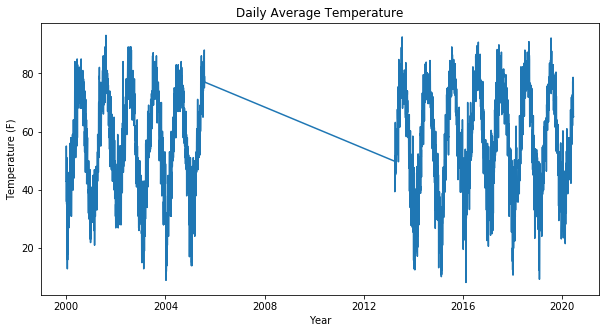

In [6]:
# plot average temperature over time

plt.figure(figsize=(10,5))

plt.plot(df_tavg['date'],df_tavg['tavg'])
plt.title('Daily Average Temperature')
plt.xlabel('Year')
plt.ylabel('Temperature (F)')

In [7]:
df_tavg.year.unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2013, 2014, 2015, 2016, 2017,
       2018, 2019, 2020], dtype=int64)

In [8]:
df_tmin.head()

,date,year,month,tmin
0,2000-01-01,2000,1,35.06
1,2000-01-02,2000,1,41.00
2,2000-01-03,2000,1,46.94
3,2000-01-04,2000,1,44.96
4,2000-01-05,2000,1,30.02


In [9]:
df_tmax.head()

,date,year,month,tmax
0,2000-01-01,2000,1,50.00
1,2000-01-02,2000,1,60.08
2,2000-01-03,2000,1,62.96
3,2000-01-04,2000,1,59.00
4,2000-01-05,2000,1,48.02


In [10]:
df_prcp.head()

,date,year,month,prcp
0,2000-01-01,2000,1,0.0
1,2000-01-02,2000,1,0.0
2,2000-01-03,2000,1,0.0
3,2000-01-04,2000,1,18.0
4,2000-01-05,2000,1,0.0


In [11]:
# Join data and fill missing tavg values with average of tmin and tmax

df = pd.DataFrame()
df['date'] = df_prcp['date']
df['year'] = df_prcp['year']
df['month'] = df_prcp['month']
df['prcp'] = df_prcp['prcp']
df['tmin'] = df.merge(df_tmin, on = 'date', how = 'left').tmin
df['tmax'] = df.merge(df_tmax, on = 'date', how = 'left').tmax
df['tavg'] = df.merge(df_tavg, on = 'date', how = 'left').tavg
df['tavg'] = df['tavg'].fillna((df['tmax']+df['tmin'])/2)
df

,date,year,month,prcp,tmin,tmax,tavg
0,2000-01-01,2000,1,0.0,35.06,50.00,42.98
1,2000-01-02,2000,1,0.0,41.00,60.08,51.08
2,2000-01-03,2000,1,0.0,46.94,62.96,55.04
3,2000-01-04,2000,1,18.0,44.96,59.00,51.98
4,2000-01-05,2000,1,0.0,30.02,48.02,39.02
...,...,...,...,...,...,...,...
7466,2020-06-10,2020,6,0.0,69.08,84.92,77.54
7467,2020-06-11,2020,6,1.3,69.98,82.94,73.76
7468,2020-06-12,2020,6,0.0,69.98,87.98,77.90
7469,2020-06-13,2020,6,0.0,60.08,77.00,70.88


In [12]:
min(df['tmin'])

1.2199999999999953

In [13]:
max(df['tmax'])

104.0

In [14]:
max(df['prcp'])

169.9

In [15]:
ind = df['prcp'].idxmax(axis = 0) 
df['date'][ind]

Timestamp('2007-04-15 00:00:00')

Text(0, 0.5, 'Temperature (F)')

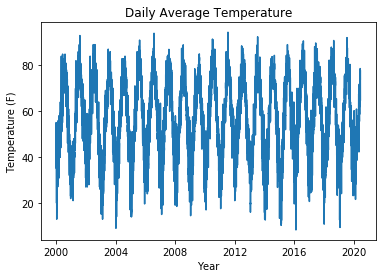

In [16]:
# plot average temperature over time

#plt.figure(figsize=(10,5))

plt.plot(df['date'],df['tavg'])
plt.title('Daily Average Temperature')
plt.xlabel('Year')
plt.ylabel('Temperature (F)')

Text(0, 0.5, 'Count')

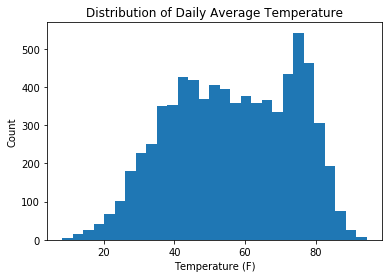

In [17]:
# Plot histogram of average temperature
df_tavg_hist = plt.hist(df['tavg'], bins = 'auto')
plt.title('Distribution of Daily Average Temperature')
plt.xlabel('Temperature (F)')
plt.ylabel('Count')

Text(0, 0.5, 'Temperature (F)')

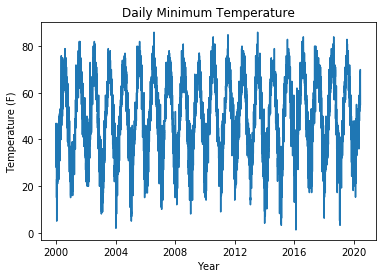

In [18]:
# plot minimum temperature over time

#plt.figure(figsize=(10,5))

plt.plot(df['date'],df['tmin'])
plt.title('Daily Minimum Temperature')
plt.xlabel('Year')
plt.ylabel('Temperature (F)')

Text(0, 0.5, 'Temperature (F)')

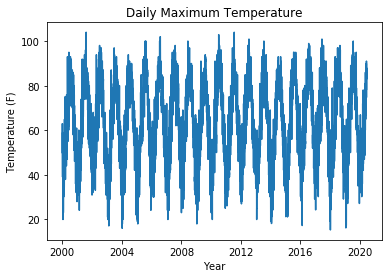

In [19]:
# plot maximum temperature over time

#plt.figure(figsize=(10,5))

plt.plot(df['date'],df['tmax'])
plt.title('Daily Maximum Temperature')
plt.xlabel('Year')
plt.ylabel('Temperature (F)')

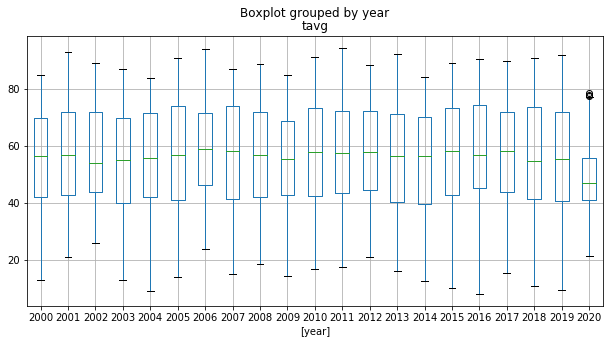

In [20]:
# boxplot of average temperature by year

bp_tavg = pd.DataFrame(df,columns = ['year','tavg'])
bp = bp_tavg.boxplot(by = 'year',figsize = (10,5))

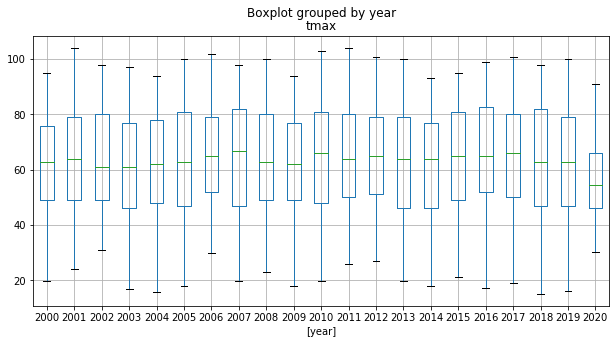

In [21]:
# boxplot of maximum temperature by year

bp_tmax = pd.DataFrame(df,columns = ['year','tmax'])
bp = bp_tmax.boxplot(by = 'year',figsize = (10,5))

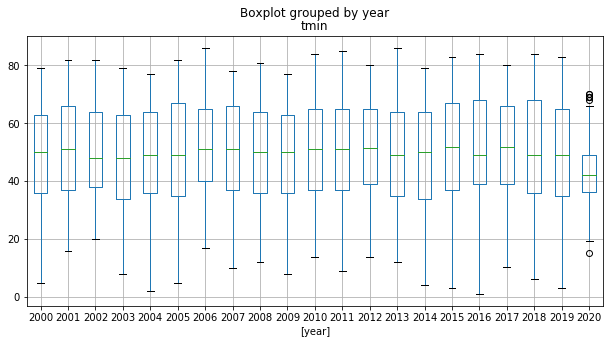

In [22]:
# boxplot of minimum temperature by year

bp_tmin = pd.DataFrame(df,columns = ['year','tmin'])
bp = bp_tmin.boxplot(by = 'year',figsize = (10,5))

In [23]:
# calculate average temperature each month

tavg_year = []
tavg_month = []
tavg_avg = []

for year in range(2000,2021):
    for month in range(1,13):
        y = df[df.year == year]
        ym = y[y.month == month]
        yma = ym.mean()
        
        tavg_year.append(str(year))
        tavg_month.append(month)
        tavg_avg.append(yma.tavg)

tavg_monthly = pd.DataFrame()
tavg_monthly['year'] = tavg_year
tavg_monthly['month'] = tavg_month
tavg_monthly['avg'] = tavg_avg
tavg_monthly

,year,month,avg
0,2000,1,32.325161
1,2000,2,37.747586
2,2000,3,47.282581
3,2000,4,51.248000
4,2000,5,63.563871
...,...,...,...
247,2020,8,NaN
248,2020,9,NaN
249,2020,10,NaN
250,2020,11,NaN


Text(0, 0.5, 'Temperature (F)')

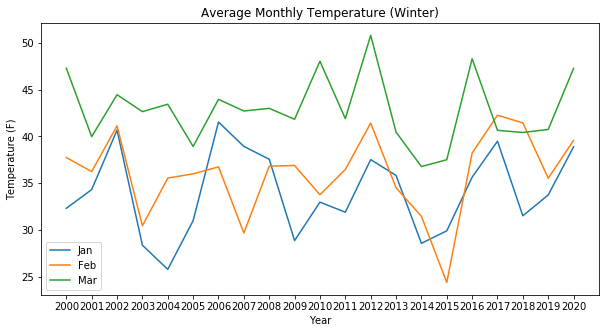

In [24]:
# average monthly temperature over time (winter months)

plt.figure(figsize=(10,5))

for month in range(1,4):
    temp = tavg_monthly[tavg_monthly.month == month]
    plt.plot(temp['year'],temp['avg'])

plt.legend(['Jan','Feb','Mar'])
plt.title('Average Monthly Temperature (Winter)')
plt.xlabel('Year')
plt.ylabel('Temperature (F)')

Text(0, 0.5, 'Temperature (F)')

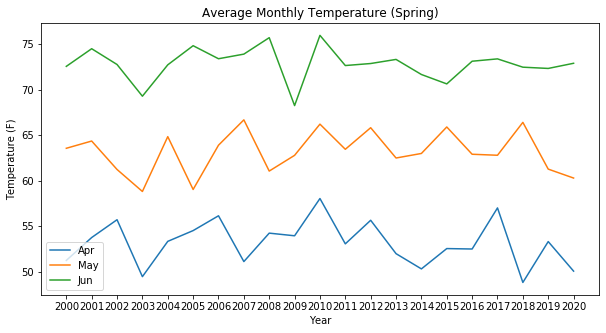

In [25]:
# average monthly temperature over time (spring months)

plt.figure(figsize=(10,5))

for month in range(4,7):
    temp = tavg_monthly[tavg_monthly.month == month]
    plt.plot(temp['year'],temp['avg'])

plt.legend(['Apr','May','Jun'])
plt.title('Average Monthly Temperature (Spring)')
plt.xlabel('Year')
plt.ylabel('Temperature (F)')

Text(0, 0.5, 'Temperature (F)')

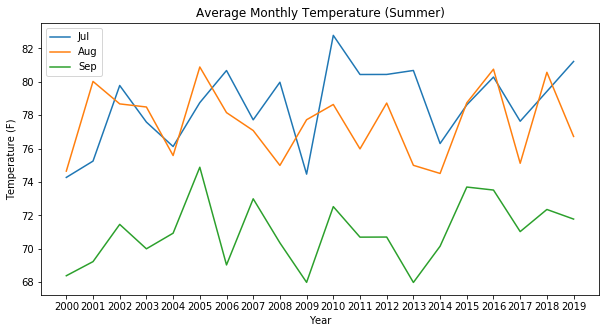

In [26]:
# average monthly temperature over time (summer months)

plt.figure(figsize=(10,5))

for month in range(7,10):
    temp = tavg_monthly[tavg_monthly.month == month]
    plt.plot(temp['year'],temp['avg'])

plt.legend(['Jul','Aug','Sep'])
plt.title('Average Monthly Temperature (Summer)')
plt.xlabel('Year')
plt.ylabel('Temperature (F)')

Text(0, 0.5, 'Temperature (F)')

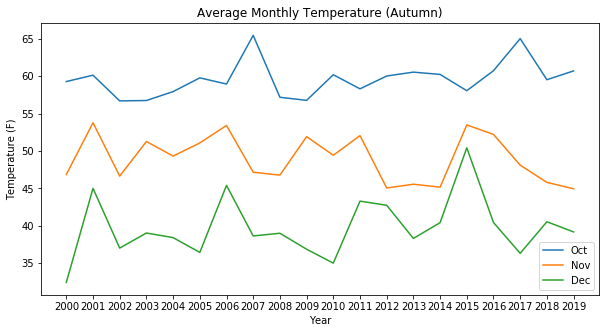

In [27]:
# average monthly temperature over time (autumn months)

plt.figure(figsize=(10,5))

for month in range(10,13):
    temp = tavg_monthly[tavg_monthly.month == month]
    plt.plot(temp['year'],temp['avg'])

plt.legend(['Oct','Nov','Dec'])
plt.title('Average Monthly Temperature (Autumn)')
plt.xlabel('Year')
plt.ylabel('Temperature (F)')

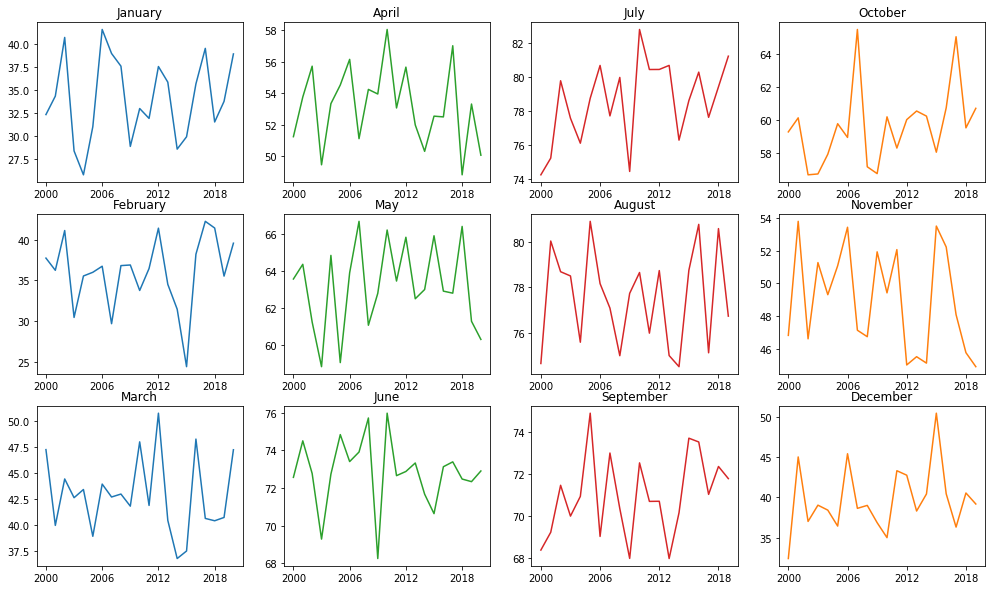

In [28]:
fig, axs = plt.subplots(3, 4, figsize = (17,10))

jan = tavg_monthly[tavg_monthly.month == 1]
axs[0, 0].plot(jan['year'],jan['avg'],'C0')
axs[0, 0].set_title('January')
axs[0, 0].xaxis.set_major_locator(plt.MaxNLocator(4))

feb = tavg_monthly[tavg_monthly.month == 2]
axs[1, 0].plot(feb['year'],feb['avg'],'C0')
axs[1, 0].set_title('February')
axs[1, 0].xaxis.set_major_locator(plt.MaxNLocator(4))

mar = tavg_monthly[tavg_monthly.month == 3]
axs[2, 0].plot(mar['year'],mar['avg'],'C0')
axs[2, 0].set_title('March')
axs[2, 0].xaxis.set_major_locator(plt.MaxNLocator(4))

apr = tavg_monthly[tavg_monthly.month == 4]
axs[0, 1].plot(apr['year'],apr['avg'],'C2')
axs[0, 1].set_title('April')
axs[0, 1].xaxis.set_major_locator(plt.MaxNLocator(4))

may = tavg_monthly[tavg_monthly.month == 5]
axs[1, 1].plot(may['year'],may['avg'],'C2')
axs[1, 1].set_title('May')
axs[1, 1].xaxis.set_major_locator(plt.MaxNLocator(4))

jun = tavg_monthly[tavg_monthly.month == 6]
axs[2, 1].plot(jun['year'],jun['avg'],'C2')
axs[2, 1].set_title('June')
axs[2, 1].xaxis.set_major_locator(plt.MaxNLocator(4))

jul = tavg_monthly[tavg_monthly.month == 7]
axs[0, 2].plot(jul['year'],jul['avg'],'C3')
axs[0, 2].set_title('July')
axs[0, 2].xaxis.set_major_locator(plt.MaxNLocator(4))

aug = tavg_monthly[tavg_monthly.month == 8]
axs[1, 2].plot(aug['year'],aug['avg'],'C3')
axs[1, 2].set_title('August')
axs[1, 2].xaxis.set_major_locator(plt.MaxNLocator(4))

sep = tavg_monthly[tavg_monthly.month == 9]
axs[2, 2].plot(sep['year'],sep['avg'],'C3')
axs[2, 2].set_title('September')
axs[2, 2].xaxis.set_major_locator(plt.MaxNLocator(4))

octo = tavg_monthly[tavg_monthly.month == 10]
axs[0, 3].plot(octo['year'],octo['avg'],'C1')
axs[0, 3].set_title('October')
axs[0, 3].xaxis.set_major_locator(plt.MaxNLocator(4))

nov = tavg_monthly[tavg_monthly.month == 11]
axs[1, 3].plot(nov['year'],nov['avg'],'C1')
axs[1, 3].set_title('November')
axs[1, 3].xaxis.set_major_locator(plt.MaxNLocator(4))

dec = tavg_monthly[tavg_monthly.month == 12]
axs[2, 3].plot(dec['year'],dec['avg'],'C1')
axs[2, 3].set_title('December')
axs[2, 3].xaxis.set_major_locator(plt.MaxNLocator(4))



Text(0.5, 0, 'Year')

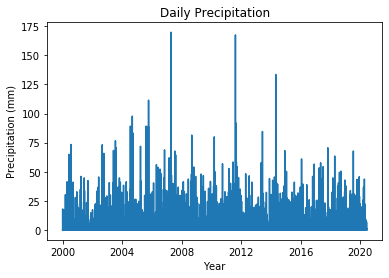

In [29]:
# daily precipitation

#plt.figure(figsize=(10,5))

plt.plot(df['date'],df['prcp'])
plt.title('Daily Precipitation')
plt.ylabel('Precipitation (mm)')
plt.xlabel('Year')

In [30]:
df['prcp']

0        0.0
1        0.0
2        0.0
3       18.0
4        0.0
        ... 
7466     0.0
7467     1.3
7468     0.0
7469     0.0
7470     0.0
Name: prcp, Length: 7471, dtype: float64

Text(0, 0.5, 'Count')

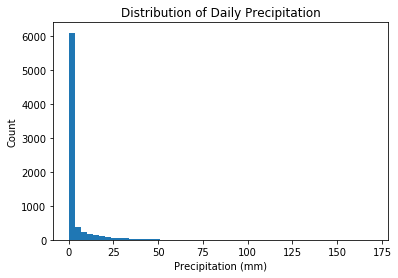

In [31]:
# Plot histogram of average precipitation
df_prcp_hist = plt.hist(df['prcp'], bins = 50)
plt.title('Distribution of Daily Precipitation')
plt.xlabel('Precipitation (mm)')
plt.ylabel('Count')


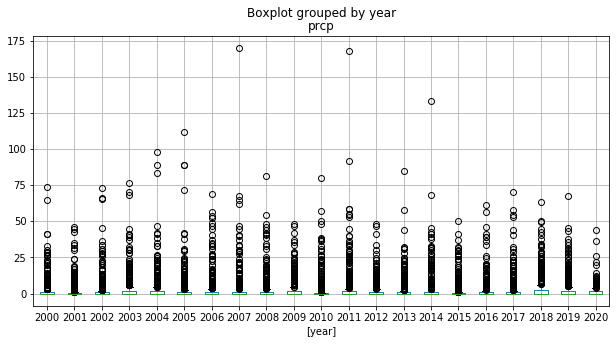

In [32]:
# boxplots of annual daily precipitation

bp_prcp = pd.DataFrame(df,columns = ['year','prcp'])
bp = bp_prcp.boxplot(by = 'year',figsize = (10,5))
#plt.ylim([-.5,10])

(-0.5, 50)

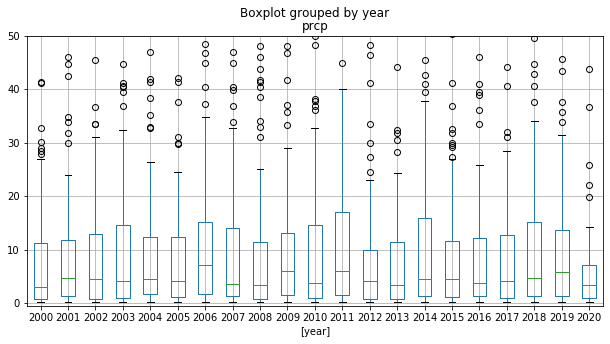

In [33]:
# boxplots of annual daily precipitation (only days with precipitation)

df_prcp_x0 = df[df.prcp>0]
bp_prcp_x0 = pd.DataFrame(df_prcp_x0,columns = ['year','prcp'])
bp_x0 = bp_prcp_x0.boxplot(by = 'year',figsize = (10,5))
plt.ylim([-.5,50])

Text(0, 0.5, 'Count')

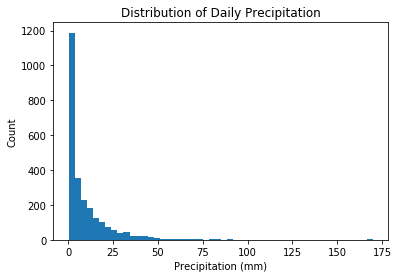

In [34]:
# Plot histogram of average precipitation
df_prcp_hist = plt.hist(df_prcp_x0['prcp'], bins = 50)
plt.title('Distribution of Daily Precipitation')
plt.xlabel('Precipitation (mm)')
plt.ylabel('Count')

In [35]:
# calculate annual precipitation and number of days with precipitation

cum_prcp = []
cum_year = []
prcp_day = []

for y in range(2000,2021):
    temp = df.loc[df['year'] == y]
    temp_count = temp[temp.prcp>0]
    temp_sum = temp_count.sum()
    cum_year.append(y)
    cum_prcp.append(temp_sum['prcp'])
    prcp_day.append(len(temp_count))

Text(0, 0.5, 'Precipitation (mm)')

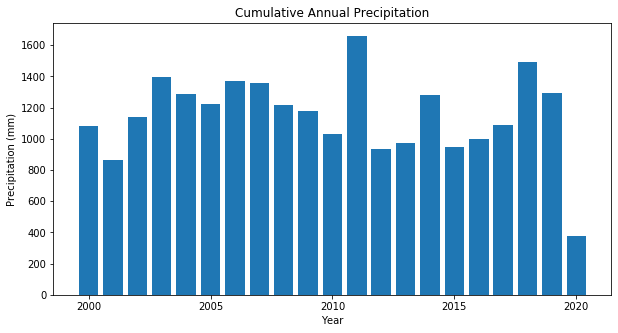

In [36]:
# bar plot of cumulative annual precipitation

plt.figure(figsize=(10,5))

plt.bar(cum_year,cum_prcp)
plt.title('Cumulative Annual Precipitation')
plt.xlabel('Year')
plt.ylabel('Precipitation (mm)')

In [37]:
cum_prcp

[1079.8999999999994,
 863.5999999999999,
 1139.8999999999999,
 1396.6999999999994,
 1288.2000000000003,
 1224.1999999999996,
 1371.099999999999,
 1357.6999999999985,
 1216.3999999999987,
 1178.0999999999997,
 1032.3999999999994,
 1659.7999999999995,
 932.8999999999996,
 974.0999999999988,
 1278.8999999999987,
 945.6999999999996,
 1001.5999999999998,
 1085.6999999999991,
 1495.4999999999989,
 1292.1000000000001,
 374.2000000000002]

In [38]:
sum(cum_prcp[:-1])/20

1190.7249999999997

Text(0, 0.5, 'Number of Days')

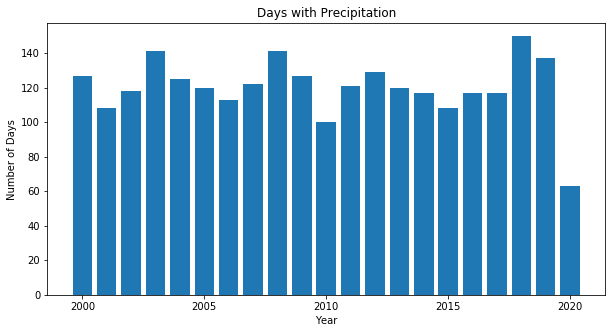

In [39]:
# bar plot of days of precipitation each year

plt.figure(figsize=(10,5))

plt.bar(cum_year,prcp_day)
plt.title('Days with Precipitation')
plt.xlabel('Year')
plt.ylabel('Number of Days')

In [40]:
prcp_day

[127,
 108,
 118,
 141,
 125,
 120,
 113,
 122,
 141,
 127,
 100,
 121,
 129,
 120,
 117,
 108,
 117,
 117,
 150,
 137,
 63]

In [41]:
sum(prcp_day[:-1])/20

122.9

Text(0, 0.5, 'Precipitation (mm)')

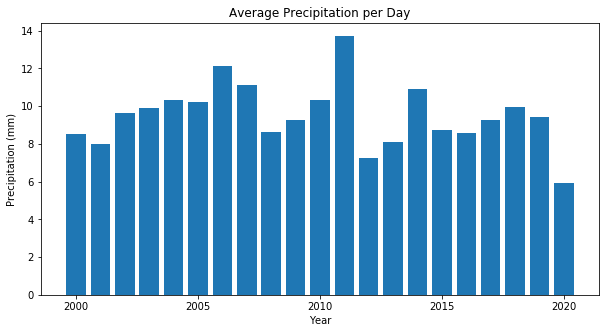

In [42]:
# bar plot of average precipitation per day (based on days with precipitation)

prcp_per_day = [float(c) / float(p) for c,p in zip(cum_prcp, prcp_day)]

plt.figure(figsize=(10,5))

plt.bar(cum_year,prcp_per_day)
plt.title('Average Precipitation per Day')
plt.xlabel('Year')
plt.ylabel('Precipitation (mm)')

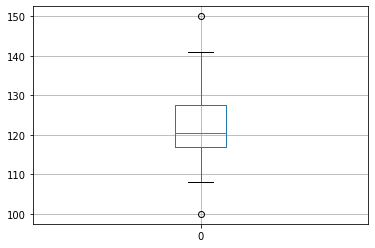

In [43]:
x = pd.DataFrame(prcp_day[:-1]).boxplot()

In [44]:
# calculate average precipitation each month

prcp_year = []
prcp_month = []
prcp_avg = []

for year in range(2000,2021):
    for month in range(1,13):
        y = df[df.year == year]
        ym = y[y.month == month]
        yma = ym.mean()
        
        prcp_year.append(str(year))
        prcp_month.append(month)
        prcp_avg.append(yma.prcp)

prcp_monthly = pd.DataFrame()
prcp_monthly['year'] = prcp_year
prcp_monthly['month'] = prcp_month
prcp_monthly['avg'] = prcp_avg
prcp_monthly

,year,month,avg
0,2000,1,2.506452
1,2000,2,1.324138
2,2000,3,2.703226
3,2000,4,2.940000
4,2000,5,3.512903
...,...,...,...
247,2020,8,NaN
248,2020,9,NaN
249,2020,10,NaN
250,2020,11,NaN


Text(0, 0.5, 'Precipitation (mm)')

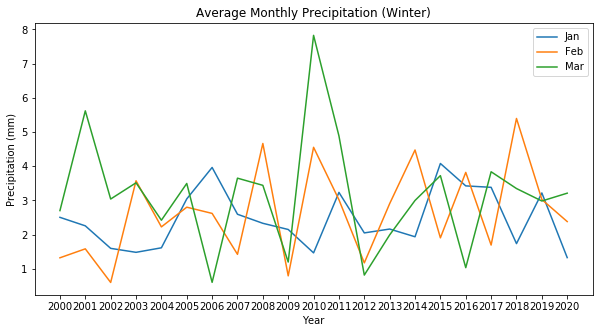

In [45]:
# average monthly precipitation over time (winter months)

plt.figure(figsize=(10,5))

for month in range(1,4):
    temp = prcp_monthly[prcp_monthly.month == month]
    plt.plot(temp['year'],temp['avg'])

plt.legend(['Jan','Feb','Mar'])
plt.title('Average Monthly Precipitation (Winter)')
plt.xlabel('Year')
plt.ylabel('Precipitation (mm)')

Text(0, 0.5, 'Precipitation (mm)')

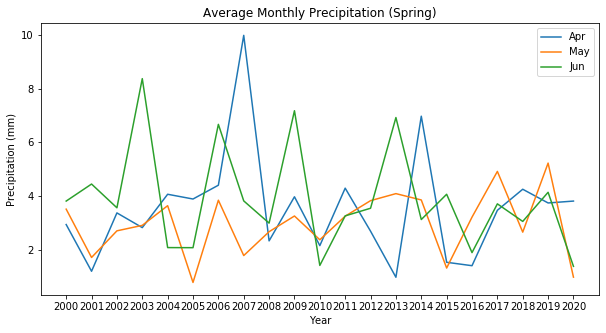

In [46]:
# average monthly precipitation over time (spring months)

plt.figure(figsize=(10,5))

for month in range(4,7):
    temp = prcp_monthly[prcp_monthly.month == month]
    plt.plot(temp['year'],temp['avg'])

plt.legend(['Apr','May','Jun'])
plt.title('Average Monthly Precipitation (Spring)')
plt.xlabel('Year')
plt.ylabel('Precipitation (mm)')

Text(0, 0.5, 'Precipitation (mm)')

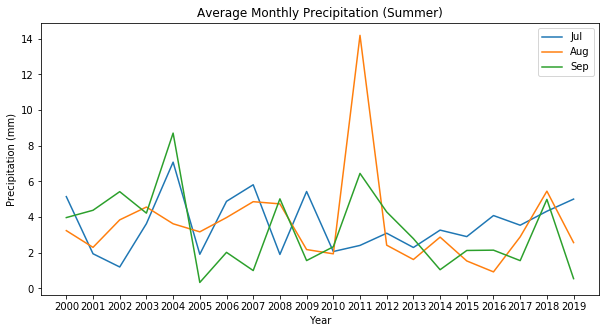

In [47]:
# average monthly precipitation over time (summer months)

plt.figure(figsize=(10,5))

for month in range(7,10):
    temp = prcp_monthly[prcp_monthly.month == month]
    plt.plot(temp['year'],temp['avg'])

plt.legend(['Jul','Aug','Sep'])
plt.title('Average Monthly Precipitation (Summer)')
plt.xlabel('Year')
plt.ylabel('Precipitation (mm)')

Text(0, 0.5, 'Precipitation (mm)')

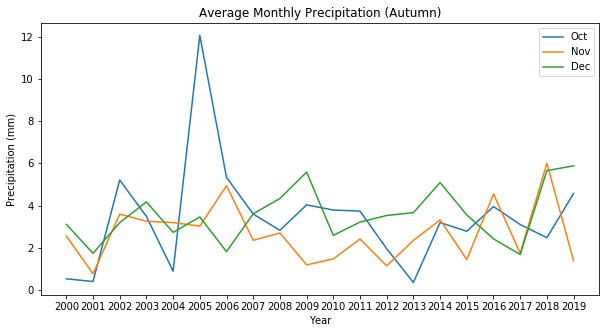

In [48]:
# average monthly temperature over time (autumn months)

plt.figure(figsize=(10,5))

for month in range(10,13):
    temp = prcp_monthly[prcp_monthly.month == month]
    plt.plot(temp['year'],temp['avg'])

plt.legend(['Oct','Nov','Dec'])
plt.title('Average Monthly Precipitation (Autumn)')
plt.xlabel('Year')
plt.ylabel('Precipitation (mm)')

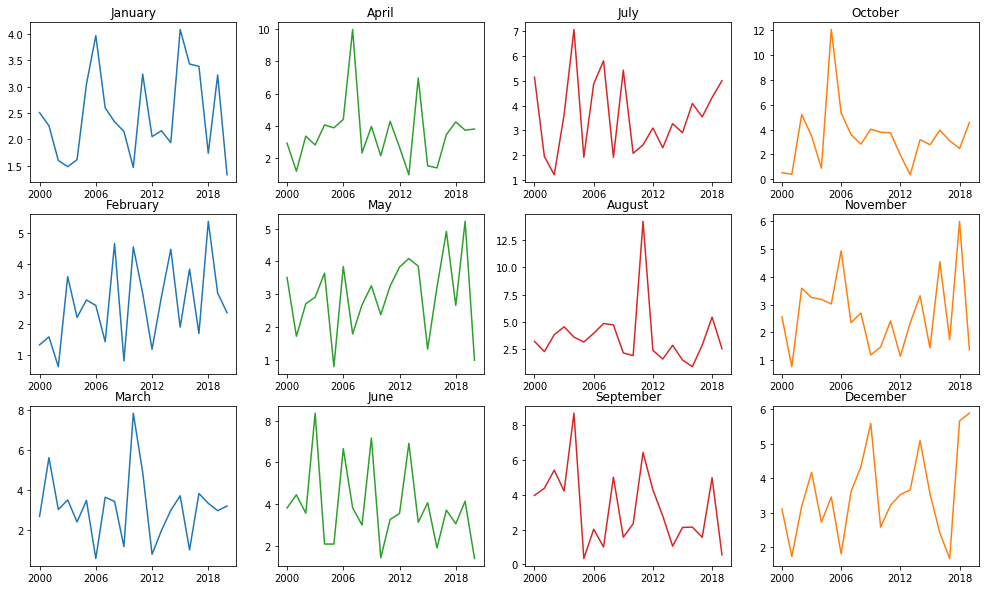

In [49]:
fig, axs = plt.subplots(3, 4, figsize = (17,10))

jan = prcp_monthly[prcp_monthly.month == 1]
axs[0, 0].plot(jan['year'],jan['avg'],'C0')
axs[0, 0].set_title('January')
axs[0, 0].xaxis.set_major_locator(plt.MaxNLocator(4))

feb = prcp_monthly[prcp_monthly.month == 2]
axs[1, 0].plot(feb['year'],feb['avg'],'C0')
axs[1, 0].set_title('February')
axs[1, 0].xaxis.set_major_locator(plt.MaxNLocator(4))

mar = prcp_monthly[prcp_monthly.month == 3]
axs[2, 0].plot(mar['year'],mar['avg'],'C0')
axs[2, 0].set_title('March')
axs[2, 0].xaxis.set_major_locator(plt.MaxNLocator(4))

apr = prcp_monthly[prcp_monthly.month == 4]
axs[0, 1].plot(apr['year'],apr['avg'],'C2')
axs[0, 1].set_title('April')
axs[0, 1].xaxis.set_major_locator(plt.MaxNLocator(4))

may = prcp_monthly[prcp_monthly.month == 5]
axs[1, 1].plot(may['year'],may['avg'],'C2')
axs[1, 1].set_title('May')
axs[1, 1].xaxis.set_major_locator(plt.MaxNLocator(4))

jun = prcp_monthly[prcp_monthly.month == 6]
axs[2, 1].plot(jun['year'],jun['avg'],'C2')
axs[2, 1].set_title('June')
axs[2, 1].xaxis.set_major_locator(plt.MaxNLocator(4))

jul = prcp_monthly[prcp_monthly.month == 7]
axs[0, 2].plot(jul['year'],jul['avg'],'C3')
axs[0, 2].set_title('July')
axs[0, 2].xaxis.set_major_locator(plt.MaxNLocator(4))

aug = prcp_monthly[prcp_monthly.month == 8]
axs[1, 2].plot(aug['year'],aug['avg'],'C3')
axs[1, 2].set_title('August')
axs[1, 2].xaxis.set_major_locator(plt.MaxNLocator(4))

sep = prcp_monthly[prcp_monthly.month == 9]
axs[2, 2].plot(sep['year'],sep['avg'],'C3')
axs[2, 2].set_title('September')
axs[2, 2].xaxis.set_major_locator(plt.MaxNLocator(4))

octo = prcp_monthly[prcp_monthly.month == 10]
axs[0, 3].plot(octo['year'],octo['avg'],'C1')
axs[0, 3].set_title('October')
axs[0, 3].xaxis.set_major_locator(plt.MaxNLocator(4))

nov = prcp_monthly[prcp_monthly.month == 11]
axs[1, 3].plot(nov['year'],nov['avg'],'C1')
axs[1, 3].set_title('November')
axs[1, 3].xaxis.set_major_locator(plt.MaxNLocator(4))

dec = prcp_monthly[prcp_monthly.month == 12]
axs[2, 3].plot(dec['year'],dec['avg'],'C1')
axs[2, 3].set_title('December')
axs[2, 3].xaxis.set_major_locator(plt.MaxNLocator(4))


In [50]:
tmin_stat = pd.Series(df['tmin']).describe()
tavg_stat = pd.Series(df['tavg']).describe()
tmax_stat = pd.Series(df['tmax']).describe()

raw_stat = pd.concat([tmin_stat,tavg_stat,tmax_stat,],axis=1)
raw_stat.columns = ['Min Temp','Avg Temp', 'Max Temp']
raw_stat.drop(['count'])

,Min Temp,Avg Temp,Max Temp
mean,49.683392,56.390060,63.224977
std,16.780240,17.287296,18.266159
min,1.220000,8.240000,15.260000
25%,37.040000,42.530000,48.020000
50%,50.000000,56.570000,64.040000
75%,64.940000,71.960000,78.980000
max,86.000000,94.460000,104.000000


In [51]:
prcp_stat = pd.Series(df_prcp_x0['prcp']).describe()

raw_stat = pd.concat([prcp_stat],axis=1)
raw_stat.columns = ['Precip']
raw_stat.drop(['count'])

,Precip
mean,9.594883
std,13.878397
min,0.300000
25%,1.300000
50%,4.300000
75%,13.000000
max,169.900000
